# Google Analytics data

In [64]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [65]:
gp= pd.read_csv("sample_user_data.csv")
gp.head()

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fullVisitorId  visitNumber      date  visitStartTime  totals_bounces  \
0  27376579751715            1  20170211      1486866293             NaN   
1  39460501403861            1  20170327      1490629516             NaN   
2  40862739425590            1  20170211      1486836571             NaN   
3  40862739425590            2  20170211      1486838824             NaN   
4  62267706107999            1  20170709      1499645960             1.0   

   totals_pageviews  totals_timeOnSite  totals_totalTransactionRevenue  \
0               5.0               49.0                             NaN   
1               2.0               99.0                             NaN   
2               2.0               14.0                             NaN   
3               3.0               35.0                             NaN   
4               1.0                NaN                             NaN   

   totals_transactions trafficSource_source trafficSource_medium  \
0                  NaN             (direct)               (none)   
1                  NaN          youtube.com             referral   
2                  NaN             (direct)               (none)   
3                  NaN             (direct)               (none)   
4                  NaN             Partners            affiliate   

  trafficSource_campaign device_deviceCategory device_operatingSystem  \
0              (not set)               desktop              Macintosh   
1              (not set)               desktop                Windows   
2              (not set)               desktop              Macintosh   
3              (not set)               desktop              Macintosh   
4       Data Share Promo               desktop                Windows   

        device_mobileDeviceModel                geoNetwork_city  \
0  not available in demo dataset  not available in demo dataset   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset                        Oakland   
3  not available in demo dataset                        Oakland   
4  not available in demo dataset  not available in demo dataset   

  channelGrouping  
0  Organic Search  
1          Social  
2     Paid Search  
3     Paid Search  
4      Affiliates

# Cleaning of data

In [66]:
#coverted visitstarttime to date format
from datetime import datetime
gp['visitStartTime']=pd.to_datetime(gp['visitStartTime'],unit='s')
gp.head()


fullVisitorId  visitNumber      date      visitStartTime  totals_bounces  \
0  27376579751715            1  20170211 2017-02-12 02:24:53             NaN   
1  39460501403861            1  20170327 2017-03-27 15:45:16             NaN   
2  40862739425590            1  20170211 2017-02-11 18:09:31             NaN   
3  40862739425590            2  20170211 2017-02-11 18:47:04             NaN   
4  62267706107999            1  20170709 2017-07-10 00:19:20             1.0   

   totals_pageviews  totals_timeOnSite  totals_totalTransactionRevenue  \
0               5.0               49.0                             NaN   
1               2.0               99.0                             NaN   
2               2.0               14.0                             NaN   
3               3.0               35.0                             NaN   
4               1.0                NaN                             NaN   

   totals_transactions trafficSource_source trafficSource_medium  \
0                  NaN             (direct)               (none)   
1                  NaN          youtube.com             referral   
2                  NaN             (direct)               (none)   
3                  NaN             (direct)               (none)   
4                  NaN             Partners            affiliate   

  trafficSource_campaign device_deviceCategory device_operatingSystem  \
0              (not set)               desktop              Macintosh   
1              (not set)               desktop                Windows   
2              (not set)               desktop              Macintosh   
3              (not set)               desktop              Macintosh   
4       Data Share Promo               desktop                Windows   

        device_mobileDeviceModel                geoNetwork_city  \
0  not available in demo dataset  not available in demo dataset   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset                        Oakland   
3  not available in demo dataset                        Oakland   
4  not available in demo dataset  not available in demo dataset   

  channelGrouping  
0  Organic Search  
1          Social  
2     Paid Search  
3     Paid Search  
4      Affiliates

In [67]:
#extracting date

gp['year']=gp['visitStartTime'].dt.year
gp['month']=gp['visitStartTime'].dt.month
gp['day']=gp['visitStartTime'].dt.day
gp['hour']=gp['visitStartTime'].dt.hour
gp['minute']=gp['visitStartTime'].dt.minute
gp.head()

fullVisitorId  visitNumber      date      visitStartTime  totals_bounces  \
0  27376579751715            1  20170211 2017-02-12 02:24:53             NaN   
1  39460501403861            1  20170327 2017-03-27 15:45:16             NaN   
2  40862739425590            1  20170211 2017-02-11 18:09:31             NaN   
3  40862739425590            2  20170211 2017-02-11 18:47:04             NaN   
4  62267706107999            1  20170709 2017-07-10 00:19:20             1.0   

   totals_pageviews  totals_timeOnSite  totals_totalTransactionRevenue  \
0               5.0               49.0                             NaN   
1               2.0               99.0                             NaN   
2               2.0               14.0                             NaN   
3               3.0               35.0                             NaN   
4               1.0                NaN                             NaN   

   totals_transactions trafficSource_source  ... device_deviceCategory  \
0                  NaN             (direct)  ...               desktop   
1                  NaN          youtube.com  ...               desktop   
2                  NaN             (direct)  ...               desktop   
3                  NaN             (direct)  ...               desktop   
4                  NaN             Partners  ...               desktop   

  device_operatingSystem       device_mobileDeviceModel  \
0              Macintosh  not available in demo dataset   
1                Windows  not available in demo dataset   
2              Macintosh  not available in demo dataset   
3              Macintosh  not available in demo dataset   
4                Windows  not available in demo dataset   

                 geoNetwork_city channelGrouping  year month  day  hour  \
0  not available in demo dataset  Organic Search  2017     2   12     2   
1  not available in demo dataset          Social  2017     3   27    15   
2                        Oakland     Paid Search  2017     2   11    18   
3                        Oakland     Paid Search  2017     2   11    18   
4  not available in demo dataset      Affiliates  2017     7   10     0   

   minute  
0      24  
1      45  
2       9  
3      47  
4      19  

[5 rows x 22 columns]

In [68]:
#bounced session, the value is 1,otherwise, it is null
gp['totals_bounces'].fillna(0,inplace=True)
gp.head()

fullVisitorId  visitNumber      date      visitStartTime  totals_bounces  \
0  27376579751715            1  20170211 2017-02-12 02:24:53             0.0   
1  39460501403861            1  20170327 2017-03-27 15:45:16             0.0   
2  40862739425590            1  20170211 2017-02-11 18:09:31             0.0   
3  40862739425590            2  20170211 2017-02-11 18:47:04             0.0   
4  62267706107999            1  20170709 2017-07-10 00:19:20             1.0   

   totals_pageviews  totals_timeOnSite  totals_totalTransactionRevenue  \
0               5.0               49.0                             NaN   
1               2.0               99.0                             NaN   
2               2.0               14.0                             NaN   
3               3.0               35.0                             NaN   
4               1.0                NaN                             NaN   

   totals_transactions trafficSource_source  ... device_deviceCategory  \
0                  NaN             (direct)  ...               desktop   
1                  NaN          youtube.com  ...               desktop   
2                  NaN             (direct)  ...               desktop   
3                  NaN             (direct)  ...               desktop   
4                  NaN             Partners  ...               desktop   

  device_operatingSystem       device_mobileDeviceModel  \
0              Macintosh  not available in demo dataset   
1                Windows  not available in demo dataset   
2              Macintosh  not available in demo dataset   
3              Macintosh  not available in demo dataset   
4                Windows  not available in demo dataset   

                 geoNetwork_city channelGrouping  year month  day  hour  \
0  not available in demo dataset  Organic Search  2017     2   12     2   
1  not available in demo dataset          Social  2017     3   27    15   
2                        Oakland     Paid Search  2017     2   11    18   
3                        Oakland     Paid Search  2017     2   11    18   
4  not available in demo dataset      Affiliates  2017     7   10     0   

   minute  
0      24  
1      45  
2       9  
3      47  
4      19  

[5 rows x 22 columns]

In [69]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464704 entries, 0 to 464703
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   fullVisitorId                   464704 non-null  object        
 1   visitNumber                     464704 non-null  int64         
 2   date                            464704 non-null  int64         
 3   visitStartTime                  464704 non-null  datetime64[ns]
 4   totals_bounces                  464704 non-null  float64       
 5   totals_pageviews                464652 non-null  float64       
 6   totals_timeOnSite               231683 non-null  float64       
 7   totals_totalTransactionRevenue  6308 non-null    float64       
 8   totals_transactions             6308 non-null    float64       
 9   trafficSource_source            464704 non-null  object        
 10  trafficSource_medium            464704 non-null  object 

In [70]:
gp['totals_totalTransactionRevenue'].fillna(0,inplace=True)
gp['totals_transactions'].fillna(0,inplace=True)
gp['totals_timeOnSite'].fillna(0,inplace=True)
gp['totals_pageviews'].fillna(0,inplace=True)
gp.head()

fullVisitorId  visitNumber      date      visitStartTime  totals_bounces  \
0  27376579751715            1  20170211 2017-02-12 02:24:53             0.0   
1  39460501403861            1  20170327 2017-03-27 15:45:16             0.0   
2  40862739425590            1  20170211 2017-02-11 18:09:31             0.0   
3  40862739425590            2  20170211 2017-02-11 18:47:04             0.0   
4  62267706107999            1  20170709 2017-07-10 00:19:20             1.0   

   totals_pageviews  totals_timeOnSite  totals_totalTransactionRevenue  \
0               5.0               49.0                             0.0   
1               2.0               99.0                             0.0   
2               2.0               14.0                             0.0   
3               3.0               35.0                             0.0   
4               1.0                0.0                             0.0   

   totals_transactions trafficSource_source  ... device_deviceCategory  \
0                  0.0             (direct)  ...               desktop   
1                  0.0          youtube.com  ...               desktop   
2                  0.0             (direct)  ...               desktop   
3                  0.0             (direct)  ...               desktop   
4                  0.0             Partners  ...               desktop   

  device_operatingSystem       device_mobileDeviceModel  \
0              Macintosh  not available in demo dataset   
1                Windows  not available in demo dataset   
2              Macintosh  not available in demo dataset   
3              Macintosh  not available in demo dataset   
4                Windows  not available in demo dataset   

                 geoNetwork_city channelGrouping  year month  day  hour  \
0  not available in demo dataset  Organic Search  2017     2   12     2   
1  not available in demo dataset          Social  2017     3   27    15   
2                        Oakland     Paid Search  2017     2   11    18   
3                        Oakland     Paid Search  2017     2   11    18   
4  not available in demo dataset      Affiliates  2017     7   10     0   

   minute  
0      24  
1      45  
2       9  
3      47  
4      19  

[5 rows x 22 columns]

In [71]:
gp.describe()

visitNumber          date  totals_bounces  totals_pageviews  \
count  464704.000000  4.647040e+05   464704.000000     464704.000000   
mean        2.333767  2.017042e+07        0.500043          3.770185   
std         9.877242  2.006409e+02        0.500001          6.401802   
min         1.000000  2.017010e+07        0.000000          0.000000   
25%         1.000000  2.017022e+07        0.000000          1.000000   
50%         1.000000  2.017042e+07        1.000000          1.000000   
75%         1.000000  2.017061e+07        1.000000          4.000000   
max       395.000000  2.017073e+07        1.000000        466.000000   

       totals_timeOnSite  totals_totalTransactionRevenue  totals_transactions  \
count      464704.000000                    4.647040e+05        464704.000000   
mean          139.534396                    2.195026e+06             0.014205   
std           374.686704                    1.069069e+08             0.136001   
min             0.000000                    0.000000e+00             0.000000   
25%             0.000000                    0.000000e+00             0.000000   
50%             0.000000                    0.000000e+00             0.000000   
75%            94.000000                    0.000000e+00             0.000000   
max         12136.000000                    4.708206e+10            25.000000   

           year          month            day           hour         minute  
count  464704.0  464704.000000  464704.000000  464704.000000  464704.000000  
mean     2017.0       4.050566      15.760374      12.663859      29.541590  
std         0.0       2.006291       8.797903       6.852505      17.282601  
min      2017.0       1.000000       1.000000       0.000000       0.000000  
25%      2017.0       2.000000       8.000000       7.000000      15.000000  
50%      2017.0       4.000000      16.000000      14.000000      30.000000  
75%      2017.0       6.000000      23.000000      18.000000      45.000000  
max      2017.0       8.000000      31.000000      23.000000      59.000000

In [72]:
gp.columns

Index(['fullVisitorId', 'visitNumber', 'date', 'visitStartTime',
       'totals_bounces', 'totals_pageviews', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactions',
       'trafficSource_source', 'trafficSource_medium',
       'trafficSource_campaign', 'device_deviceCategory',
       'device_operatingSystem', 'device_mobileDeviceModel', 'geoNetwork_city',
       'channelGrouping', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [73]:
gp['geoNetwork_city'].replace('not available in demo dataset', 'Notdata',inplace=True)
gp['geoNetwork_city'].replace('(not set)', 'Notdata',inplace=True)
gp.head()

fullVisitorId  visitNumber      date      visitStartTime  totals_bounces  \
0  27376579751715            1  20170211 2017-02-12 02:24:53             0.0   
1  39460501403861            1  20170327 2017-03-27 15:45:16             0.0   
2  40862739425590            1  20170211 2017-02-11 18:09:31             0.0   
3  40862739425590            2  20170211 2017-02-11 18:47:04             0.0   
4  62267706107999            1  20170709 2017-07-10 00:19:20             1.0   

   totals_pageviews  totals_timeOnSite  totals_totalTransactionRevenue  \
0               5.0               49.0                             0.0   
1               2.0               99.0                             0.0   
2               2.0               14.0                             0.0   
3               3.0               35.0                             0.0   
4               1.0                0.0                             0.0   

   totals_transactions trafficSource_source  ... device_deviceCategory  \
0                  0.0             (direct)  ...               desktop   
1                  0.0          youtube.com  ...               desktop   
2                  0.0             (direct)  ...               desktop   
3                  0.0             (direct)  ...               desktop   
4                  0.0             Partners  ...               desktop   

  device_operatingSystem       device_mobileDeviceModel geoNetwork_city  \
0              Macintosh  not available in demo dataset         Notdata   
1                Windows  not available in demo dataset         Notdata   
2              Macintosh  not available in demo dataset         Oakland   
3              Macintosh  not available in demo dataset         Oakland   
4                Windows  not available in demo dataset         Notdata   

  channelGrouping  year month  day  hour  minute  
0  Organic Search  2017     2   12     2      24  
1          Social  2017     3   27    15      45  
2     Paid Search  2017     2   11    18       9  
3     Paid Search  2017     2   11    18      47  
4      Affiliates  2017     7   10     0      19  

[5 rows x 22 columns]

In [74]:
gp.isnull().sum()

fullVisitorId                     0
visitNumber                       0
date                              0
visitStartTime                    0
totals_bounces                    0
totals_pageviews                  0
totals_timeOnSite                 0
totals_totalTransactionRevenue    0
totals_transactions               0
trafficSource_source              0
trafficSource_medium              0
trafficSource_campaign            0
device_deviceCategory             0
device_operatingSystem            0
device_mobileDeviceModel          0
geoNetwork_city                   0
channelGrouping                   0
year                              0
month                             0
day                               0
hour                              0
minute                            0
dtype: int64

# Perform EDA on the data

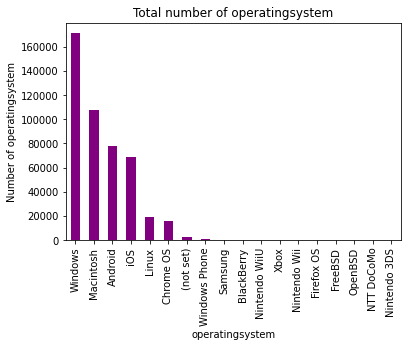

In [75]:
#total operationg system
gp['device_operatingSystem'].value_counts().plot(kind='bar',color='purple')
plt.title("Total number of operatingsystem")
plt.ylabel('Number of operatingsystem')
plt.xlabel('operatingsystem');

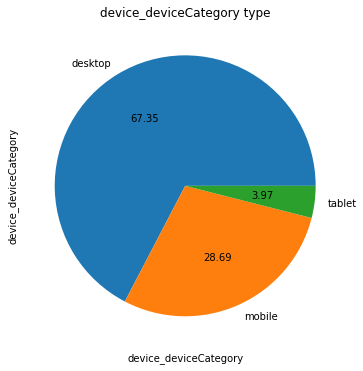

In [76]:
#total devices used
gp['device_deviceCategory'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("device_deviceCategory type")
plt.xlabel('device_deviceCategory');

<AxesSubplot:ylabel='totals_bounces'>

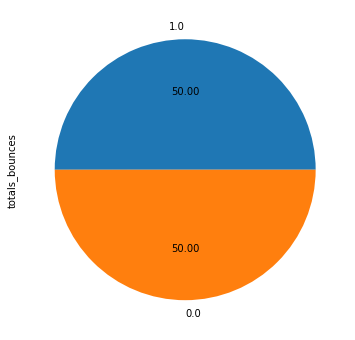

In [77]:
#total bounsus occured while processing a transaction
gp['totals_bounces'].value_counts()
gp['totals_bounces'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')

There was 50% of time transaction  was bounced and 50% of time sucessful

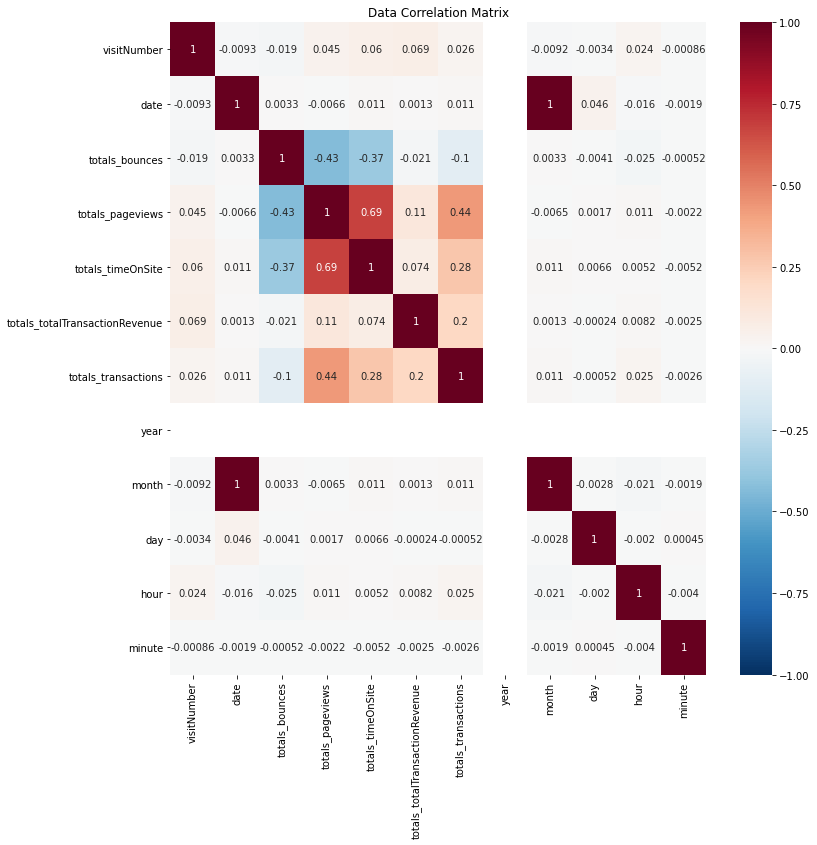

In [78]:
fig1 = plt.figure(figsize=(12,12));
gp.corr()
plt.title('Data Correlation Matrix')
sns.heatmap(gp.corr(), vmin = -1, vmax = 1, cmap = 'RdBu_r', annot=True);

In [79]:
gp_month = gp.groupby('month').count()['totals_totalTransactionRevenue'].reset_index()

Text(0.5, 0, 'month')

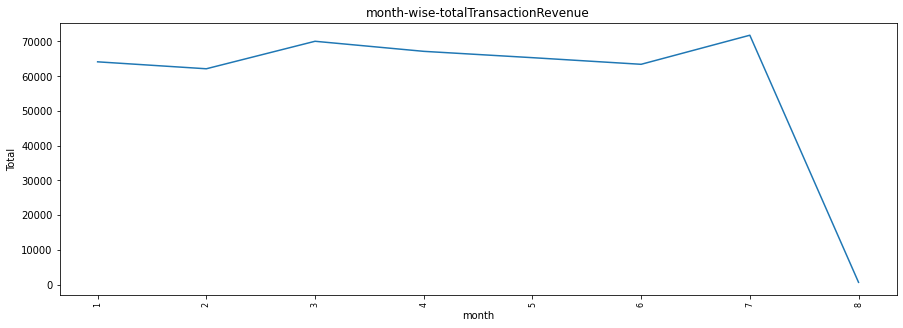

In [80]:
plt.figure(figsize=[15,5])
plt.plot(gp_month['month'],gp_month['totals_totalTransactionRevenue'])
plt.xticks(rotation = 'vertical',size=8)

plt.title('month-wise-totalTransactionRevenue')
plt.ylabel('Total')
plt.xlabel('month')

In [81]:
gp_day = gp.groupby('day').count()['totals_totalTransactionRevenue'].reset_index()

Text(0.5, 0, 'day')

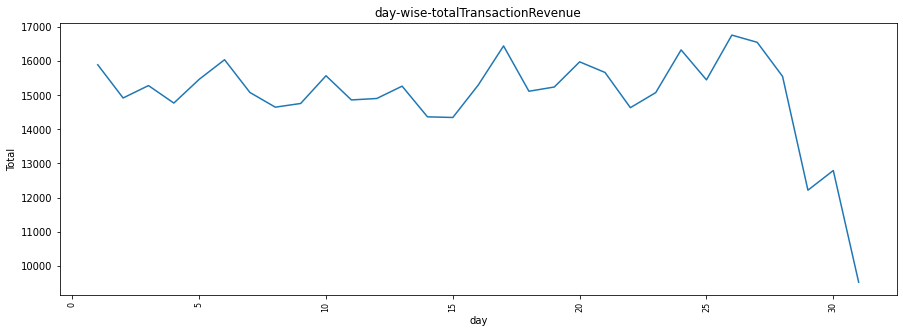

In [82]:
plt.figure(figsize=[15,5])
plt.plot(gp_day['day'],gp_day['totals_totalTransactionRevenue'])
plt.xticks(rotation = 'vertical',size=8)

plt.title('day-wise-totalTransactionRevenue')
plt.ylabel('Total')
plt.xlabel('day')

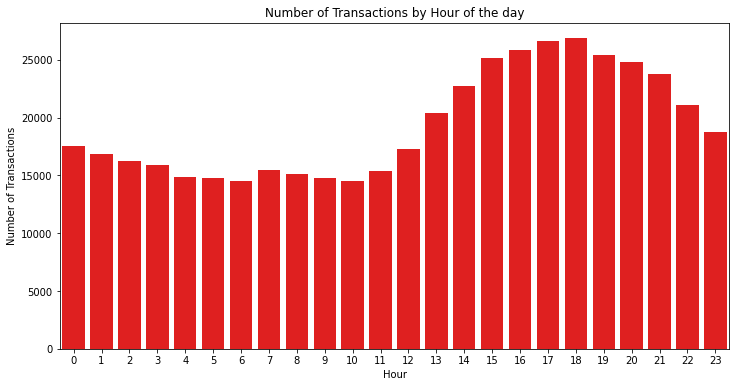

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=gp, color='red')
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Hour of the day");

# Create a column new visitor will transact or not.

In [84]:
gp['transact'] = np.where(gp['totals_transactions']  == 0, '0','1')
gp['transact'] = gp['transact'].astype('str')

In [85]:
gp.head()

fullVisitorId  visitNumber      date      visitStartTime  totals_bounces  \
0  27376579751715            1  20170211 2017-02-12 02:24:53             0.0   
1  39460501403861            1  20170327 2017-03-27 15:45:16             0.0   
2  40862739425590            1  20170211 2017-02-11 18:09:31             0.0   
3  40862739425590            2  20170211 2017-02-11 18:47:04             0.0   
4  62267706107999            1  20170709 2017-07-10 00:19:20             1.0   

   totals_pageviews  totals_timeOnSite  totals_totalTransactionRevenue  \
0               5.0               49.0                             0.0   
1               2.0               99.0                             0.0   
2               2.0               14.0                             0.0   
3               3.0               35.0                             0.0   
4               1.0                0.0                             0.0   

   totals_transactions trafficSource_source  ... device_operatingSystem  \
0                  0.0             (direct)  ...              Macintosh   
1                  0.0          youtube.com  ...                Windows   
2                  0.0             (direct)  ...              Macintosh   
3                  0.0             (direct)  ...              Macintosh   
4                  0.0             Partners  ...                Windows   

        device_mobileDeviceModel geoNetwork_city channelGrouping  year month  \
0  not available in demo dataset         Notdata  Organic Search  2017     2   
1  not available in demo dataset         Notdata          Social  2017     3   
2  not available in demo dataset         Oakland     Paid Search  2017     2   
3  not available in demo dataset         Oakland     Paid Search  2017     2   
4  not available in demo dataset         Notdata      Affiliates  2017     7   

  day  hour  minute  transact  
0  12     2      24         0  
1  27    15      45         0  
2  11    18       9         0  
3  11    18      47         0  
4  10     0      19         0  

[5 rows x 23 columns]

In [86]:
#tranctn done from all medium
#Considering 1 as transact complete.

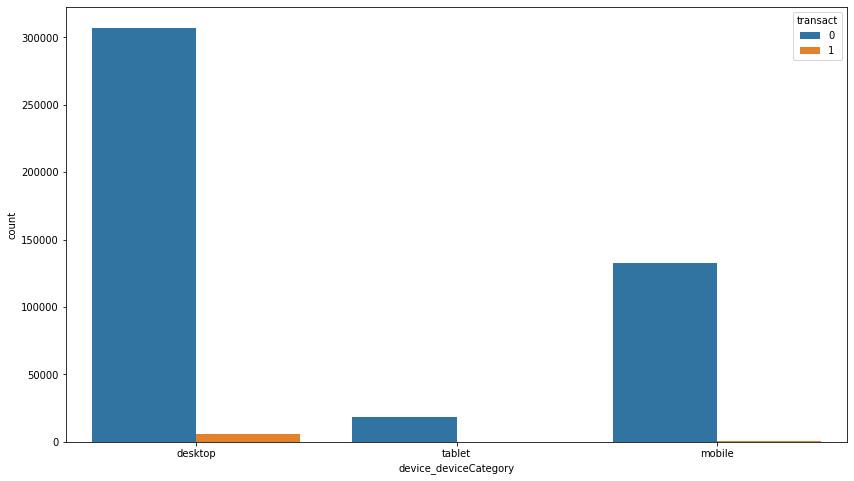

In [87]:
plt.figure(figsize=(14,8))
sns.countplot(x='device_deviceCategory', hue = 'transact', data=gp);

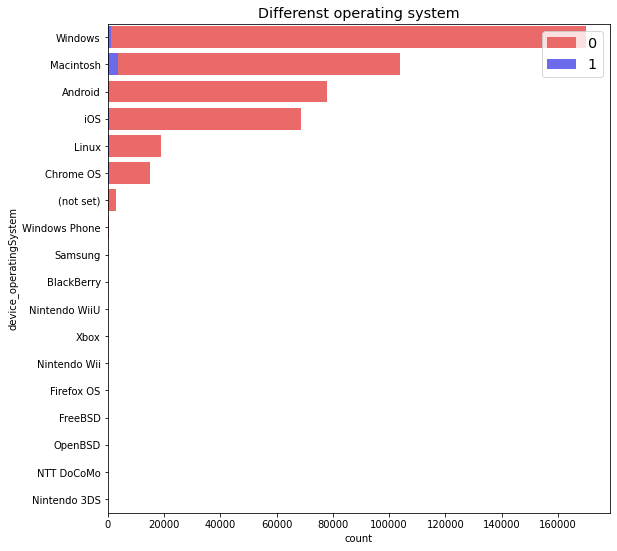

In [88]:
plt.figure(figsize=(9, 9))
sns.countplot(y='device_operatingSystem', data=gp, order=gp['device_operatingSystem'].value_counts().index,
              dodge=False, palette='seismic_r', hue='transact')
plt.title('Differenst operating system', size='x-large')
plt.legend(fontsize='x-large')
plt.show()

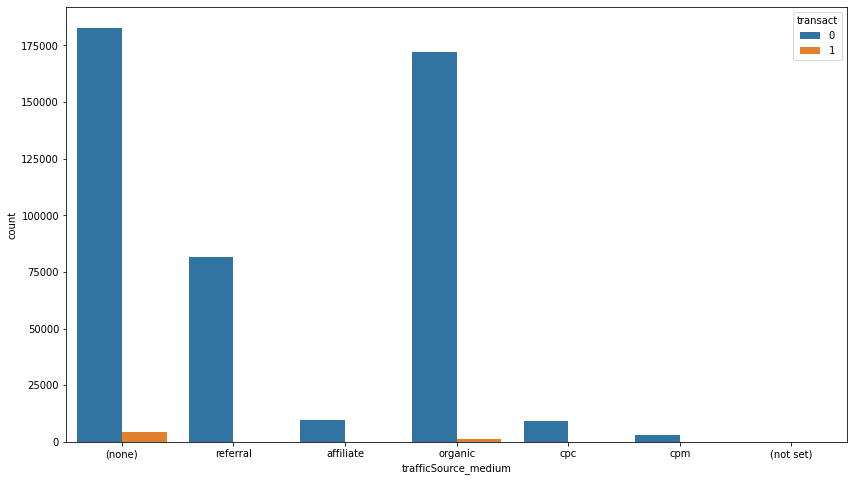

In [89]:
plt.figure(figsize=(14,8))
sns.countplot(x='trafficSource_medium', hue = 'transact', data=gp,);

# Build a decision tree prediction model to predict if the new visitor will transact or not.


In [90]:
#seperated data which having many catefory and few category
cat_many_label_cols = ["channelGrouping","geoNetwork_city","device_operatingSystem", "trafficSource_campaign","trafficSource_medium", "trafficSource_source"]
cat_few_label_cols = ["device_deviceCategory"]

In [91]:
# to perform label encoding 
from sklearn import preprocessing
for col in cat_many_label_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(gp[col].values.astype('str')))
    gp[col] = lbl.transform(list(gp[col].values.astype('str')))
    
gp = pd.get_dummies(gp,columns=cat_few_label_cols)

channelGrouping
geoNetwork_city
device_operatingSystem
trafficSource_campaign
trafficSource_medium
trafficSource_source


In [92]:
feature_cols = ['visitNumber',
 'totals_bounces',
 'totals_pageviews',
 'totals_timeOnSite',
 'trafficSource_source',
 'trafficSource_medium',
 'trafficSource_campaign',
 'device_operatingSystem',
 'geoNetwork_city',
 'channelGrouping',              
 'device_deviceCategory_desktop',
 'device_deviceCategory_mobile']

X = gp[feature_cols] 

y = gp.transact


In [93]:
X.shape

(464704, 12)

In [94]:
y.shape

(464704,)

In [95]:
# Split the dataset into training set and test set. We put puts 70% of the data into a training set and 30% of the data into a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [96]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [97]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [98]:
#accuracy of a model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9815080480876825


In [99]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    137496
           1       0.32      0.32      0.32      1916

   micro avg       0.98      0.98      0.98    139412
   macro avg       0.66      0.65      0.66    139412
weighted avg       0.98      0.98      0.98    139412



# Viualizing decision  tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.1358 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.1358 to fit



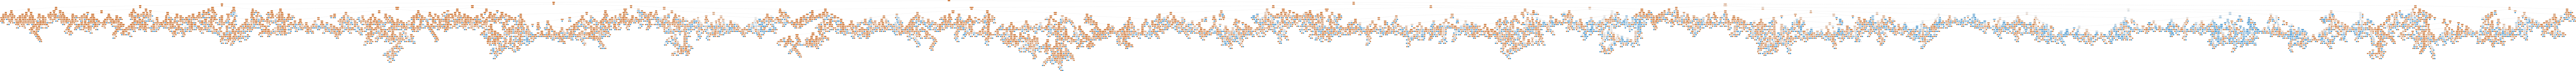

In [102]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())
